# Analysis of run741CU data

A quick exploratory analysis of rn741CU dataset obtained from Victor. 
Dataset URL https://checkpoint.url-protection.com/v1/url?o=http%3A//www.star.uclan.ac.uk/~vpd/4stefan.tar&g=MzEwMDg0NmNkODNjZGNhZg==&h=ZWNkMjFiZTZkOTY4NzJhY2Q5MDYwMWM2ZjAyMjE1YzVlODE4NmM5MGUyMzNhMDMxM2I3MmRlZjRhNGJkNGNlMw==&p=Y3AxZTp1Y2xhbmxpdmU6YzpvOjllYjJkY2RlMDRmZTYyNWExZjE0YmJhOWRhY2VlMjk2OnYxOmg6VA==

In [2]:
%matplotlib inline
from matplotlib.pylab import *

import importlib.util
import sys

base_dir = '/home/ubuntu/projects/S2B/shared/'
pdm_fname = base_dir + 'pdm.py'

spec = importlib.util.spec_from_file_location("pdm", pdm_fname)
pdm = importlib.util.module_from_spec(spec)
sys.modules["pdm"] = pdm
spec.loader.exec_module(pdm)

rcParams['figure.figsize'] = (10,6)
rcParams['font.size'] = 18

## Basic data loading/exploration

Loading a simulation output using the `pynbody.load()` function, which tries to automatically determine which type of code output you have:

In [4]:
import pynbody as pb

data_fname1 = base_dir + 'run741CU/run741CU.00500.gz'
data_fname2 = base_dir + 'run741CU/run741CU.01000.gz'
param_fname = base_dir + 'run741CU/run741CU.param'

s = pdm.pbload(data_fname1,param_fname)

Loading data from file...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:00.029088



/home/ubuntu/.local/lib/python3.10/site-packages/pynbody/snapshot/tipsy.py:124: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  warnings.warn(


Note that the above assumes you have downloaded and unpacked the test data in the above folder.

In [27]:
s

<SimSnap "/home/ubuntu/projects/S2B/shared/run741CU/run741CU.00500" len=10000000>

In [28]:
len(s)

10000000

In [29]:
len(s.stars)

6000000

`stars`, `gas`, `dark` also available as `s`, `g`, `d`

In [30]:
len(s.star), len(s.gas), len(s.dark)

(6000000, 0, 4000000)

The `properties` attribute of a `SimSnap` tells us some more basic info 

In [31]:
s.properties

{'time': Unit("2.50e-05 kpc**3/2 Msol**-1/2 G**-1/2")}

In [32]:
s.properties['time'].in_units('Myr')

11.786978152775673

Which quantities do we have available?

In [33]:
s.keys()

[]

None! Because pynbody "lazy-loads" data... so lets see which data is actually on-disk:

In [34]:
s.loadable_keys()

['mass', 'eps', 'pos', 'phi', 'vel']

vel - velocity components vx, vy, vz - **km/s ?**, 
**phi - ?**, 
**eps - ?**, 
pos - position components x, y, z - kpc, 
mass - particle mass, **units?**

## Accessing data

To access any of these arrays or vectors, you access them like a python dictionary: 

In [35]:
s.star['pos']

SimArray([[ 0.35583305,  4.08547497, -0.37093452],
          [ 0.48441628, -0.54632998,  0.23705608],
          [ 0.10476512, -3.03144145,  0.12226705],
          ...,
          [ 1.75160432,  6.71199369,  0.15174362],
          [-9.37289429, 10.85958004, -0.44605705],
          [10.69618893, -4.75199938, -0.03752042]], 'kpc')

Note that each array has units attached...

In [36]:
s.star['vel']

SimArray([[-108.74482727, -111.48087311,  -22.97254753],
          [ -62.93807983,   40.27892303,   93.48606873],
          [ 128.16964722,    9.59884357,   60.19284439],
          ...,
          [-103.17414856,   57.62744141,  -14.77744293],
          [-173.13807678, -137.88986206,   -9.49917793],
          [  46.26496887,  191.44252014,   -4.15424967]], '1.00e+05 G**1/2 Msol**1/2 kpc**-1/2')

**Are those feasible velocity components, like 39703 km/s ?**

By default everything is in system units, but most of the time thinking in physical units is easier: But aparently there is no physical units defined in this dataset.

In [37]:
s.physical_units()

We have defined many useful quantities that are automatically calculated for you. For example, the radial and tangential velocities are simply obtained by

In [38]:
s.star['vt'],s.star['vr']

(SimArray([21624.71251085, 23429.01890165, 29428.80253425, ...,
           23936.74338035, 45907.93095353, 40189.52371876], 'km s**-1'),
 SimArray([-24459.22901991,  -8194.46193325,   -567.78936031, ...,
             6092.63002241,   1873.00727692,  -7348.55867184], 'km s**-1'))

You can get a list of all available derivable quantities 

In [39]:
s.derivable_keys()[0:10]

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe']

## Rendering simple images with pynbody built-in functions

We render some simple images with pynbody image function, faceon, edgeon.

SimArray([[1.0116978e-21, 9.7361309e-22, 9.3552805e-22, ...,
           4.6218969e-22, 4.4272692e-22, 4.2326419e-22],
          [9.7837715e-22, 9.3189227e-22, 8.8540728e-22, ...,
           5.1179963e-22, 4.9217772e-22, 4.7255585e-22],
          [9.4505658e-22, 8.9017155e-22, 8.3528637e-22, ...,
           5.6140961e-22, 5.4162857e-22, 5.2184757e-22],
          ...,
          [3.9503461e-22, 3.8757607e-22, 3.8011761e-22, ...,
           2.4529714e-22, 2.3485901e-22, 2.2442086e-22],
          [4.2436804e-22, 4.0617118e-22, 3.8797424e-22, ...,
           2.4112383e-22, 2.2908109e-22, 2.1703835e-22],
          [4.5370150e-22, 4.2476623e-22, 3.9583084e-22, ...,
           2.3695049e-22, 2.2330317e-22, 2.0965588e-22]], dtype=float32, 'g cm**-3')

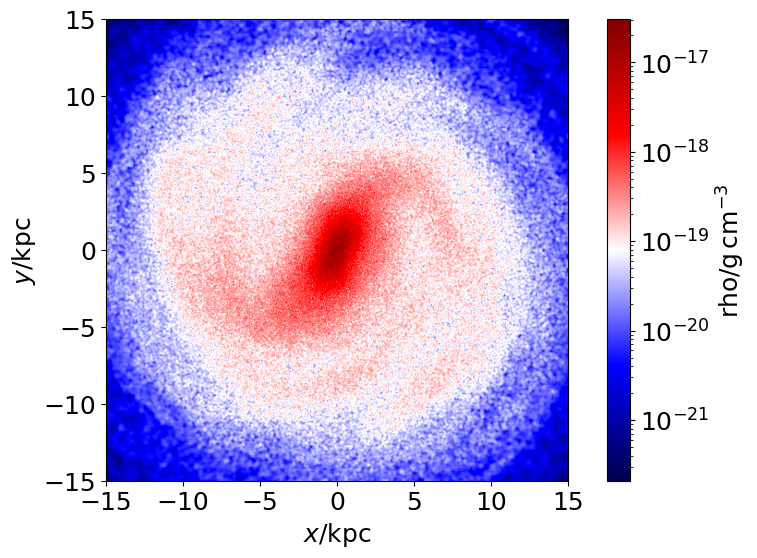

In [40]:
import pynbody.plot.sph as sph
cmap = 'seismic'

pb.analysis.angmom.faceon(s)
sph.image(s.star,qty="rho",units='g cm^-3',width=30,cmap=cmap)

We see that the bar is almost aligned with the line of sight for edge-on.
Let us rotate 90 clockwise around Z axis.

SimArray([[4.5368529e-22, 4.2452445e-22, 3.9536361e-22, ...,
           9.4479727e-22, 9.7840785e-22, 1.0120186e-21],
          [4.2475381e-22, 4.0644204e-22, 3.8813024e-22, ...,
           8.8973362e-22, 9.3179654e-22, 9.7385947e-22],
          [3.9582228e-22, 3.8835963e-22, 3.8089698e-22, ...,
           8.3467022e-22, 8.8518514e-22, 9.3570000e-22],
          ...,
          [2.3695049e-22, 2.4112383e-22, 2.4529714e-22, ...,
           5.6120211e-22, 5.1169613e-22, 4.6219020e-22],
          [2.2330317e-22, 2.2908109e-22, 2.3485901e-22, ...,
           5.4152012e-22, 4.9212390e-22, 4.4272767e-22],
          [2.0965588e-22, 2.1703835e-22, 2.2442086e-22, ...,
           5.2183813e-22, 4.7255161e-22, 4.2326515e-22]], dtype=float32, 'g cm**-3')

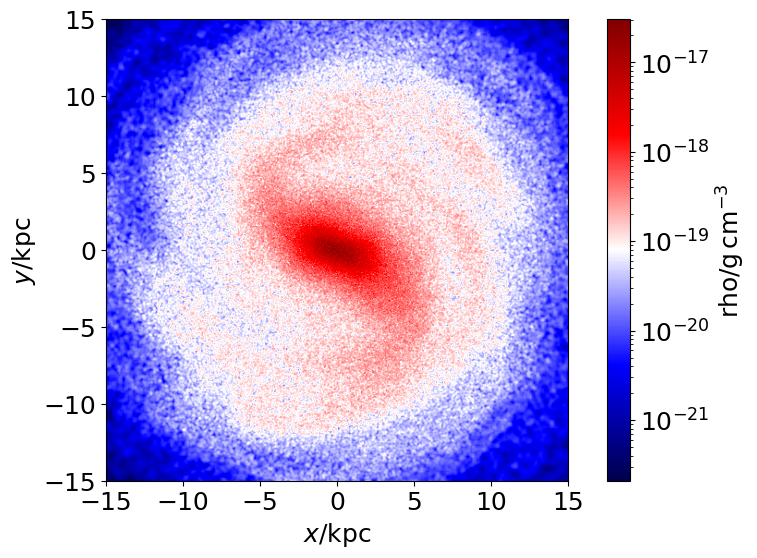

In [41]:
s.rotate_z(90)
sph.image(s.star,qty="rho",units='g cm^-3',width=30,cmap=cmap)

Let us rotate 90 clockwise around X axis to get an edge-on view.

SimArray([[8.7488951e-26, 8.9438603e-26, 9.1388254e-26, ...,
           1.2655414e-27, 1.2599239e-27, 1.2543067e-27],
          [8.9378865e-26, 9.1325120e-26, 9.3271370e-26, ...,
           1.5046282e-27, 1.4910131e-27, 1.4773980e-27],
          [9.1268779e-26, 9.3211632e-26, 9.5154485e-26, ...,
           1.7437150e-27, 1.7221022e-27, 1.7004894e-27],
          ...,
          [6.3070477e-26, 6.4620441e-26, 6.6170398e-26, ...,
           3.0802307e-26, 3.1402050e-26, 3.2001791e-26],
          [6.1000469e-26, 6.2491564e-26, 6.3982671e-26, ...,
           2.9864561e-26, 3.0447711e-26, 3.1030861e-26],
          [5.8930449e-26, 6.0362694e-26, 6.1794938e-26, ...,
           2.8926814e-26, 2.9493371e-26, 3.0059930e-26]], dtype=float32, 'g cm**-3')

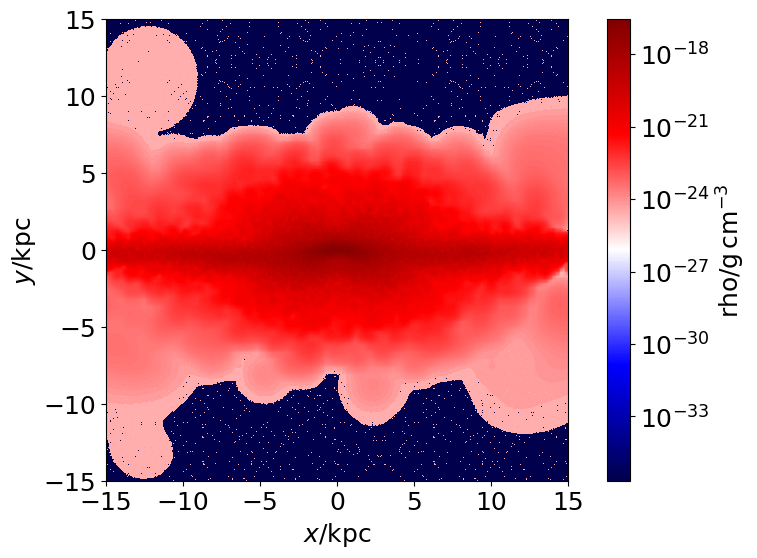

In [42]:
s.rotate_x(90)
sph.image(s.star,qty="rho",units='g cm^-3',width=30,cmap=cmap)

## Calculate and plot binned 2d-statistics, same as with R1 model.

Loading data from file...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:00.017602



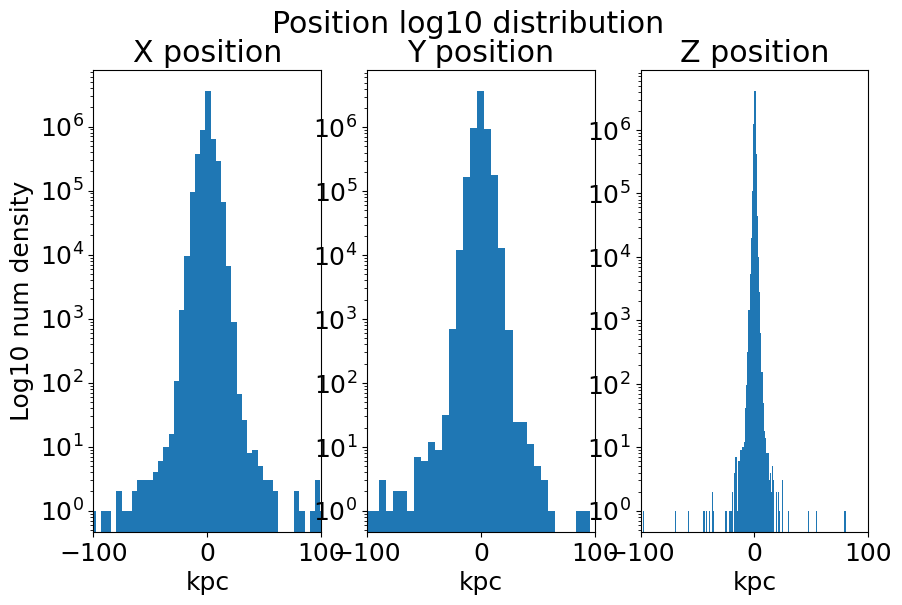

In [5]:
density = {}

# We reload the data to drop effects of prevous manipulations and centre it for face-on view.

s = pdm.pbload(data_fname1,param_fname)
pb.analysis.angmom.faceon(s)

# Extracting position and velocity components

x = s.s['pos'][:,0]
y = s.s['pos'][:,1]
z = s.s['pos'][:,2]
vx = s.s['vel'][:,0]
vy = s.s['vel'][:,1]
vz = s.s['vel'][:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Position log10 distribution')
ax1.hist(x, log = True, bins = 200)
ax1.set_title('X position')
ax1.set_xlim(-100, 100)
ax1.set_xlabel('kpc')
ax1.set_ylabel('Log10 num density')
ax2.hist(y, log = True, bins = 200)
ax2.set_title('Y position')
ax2.set_xlim(-100, 100)
ax2.set_xlabel('kpc')
ax3.hist(z, log = True, bins = 200)
ax3.set_title('Z position')
ax3.set_xlim(-100, 100)
ax3.set_xlabel('kpc')
plt.show()


Calculate the binned 2d statisticss for number densities and plot face-on view.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:03.954804



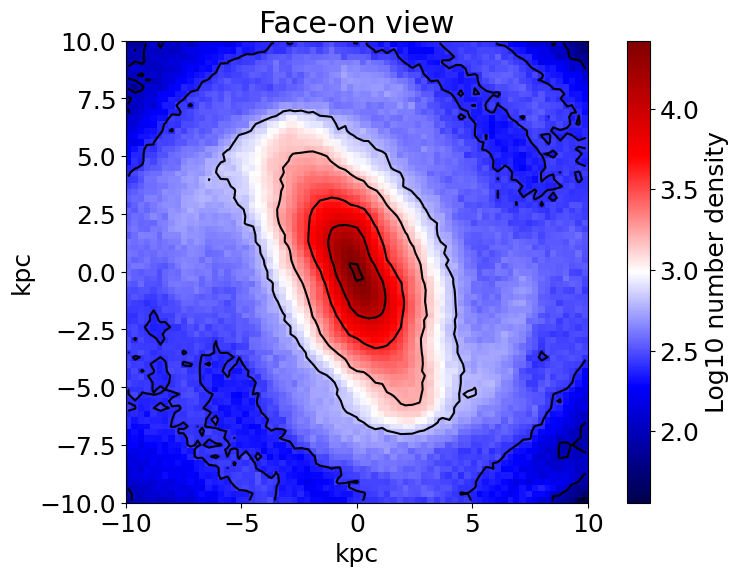

<Figure size 1000x600 with 0 Axes>

In [6]:
plt_title = 'Face-on view'
cbar_label = 'Log10 number density'

xlim,ylim = 10, 10

pdm.RenderDensity(x,y,'None',xlim,ylim,plt_title,cbar_label)

Rotate 80 degree around Z axis to allign teh bar.
Rotate 90 degree around X axis for edge-on view.
Calculate the binned 2d statistics for velocity and plot.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:02.232672



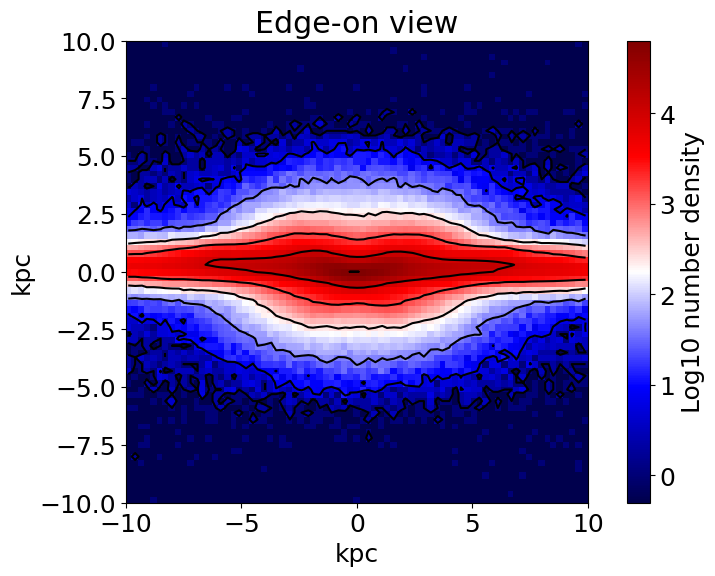

<Figure size 1000x600 with 0 Axes>

In [7]:
density_title = 'Edge-on view'
density_cbar_label = 'Log10 number density'

xlim,ylim = 10, 10

# Rotate 1000 around Z axis to align teh bar.
# Extract position and velocity components

pos_data = pdm.mat_rotate_z(x, y, z, 100)
x = pos_data[:,0]
y = pos_data[:,1]
z = pos_data[:,2]

v_data = pdm.mat_rotate_z(vx, vy, vz, 100)
vx = v_data[:,0]
vy = v_data[:,1]
vz = v_data[:,2]

# Rotate 90 around X axis for edge-on view.
# Extract position and velocity components

pos_data = pdm.mat_rotate_x(x, y, z, 90)
x = pos_data[:,0]
y = pos_data[:,1]
z = pos_data[:,2]

v_data = pdm.mat_rotate_x(vx, vy, vz, 90)
vx = v_data[:,0]
vy = v_data[:,1]
vz = v_data[:,2]

pdm.RenderDensity(x,y,'None',xlim,ylim,density_title,density_cbar_label)

**So I am wondering here, what am I doing wrong compared to R1 model binnes stats plotting?**